In [1]:
from IPython.display import Latex
# Latex(r"""\begin{eqnarray} \large 
# Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p))))))
# \end{eqnarray}""")

# Parameterized machine learning algo: 
## tanh(Z) = (a  exp(Z) - b exp(-Z)) / (c exp(Z) + d exp(-Z))
### with parameters a,b,c,d s.t. ad - bc = 1

    Sequential iteration of difference equation:
    %      decPwrAFxDst.m:
    P = [1.13761386, -0.11556857];
    for n = 1:numel(P)
        Z = 1/Z - Z^(n*Z^(P(n)^n) / sqrt(pi));
    end
    

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

```c
% decPwrAFxLFQNTAAAEZ
% lanier@rohan.sdsu.edu	26-Jul-2008
%/Users/danlanier/MatlabFrctGrphcCC/WhilFunction/TotAllyRad/decPwrAFx.m
% bBox: UL=-6.72+4.2i, UR=6.72+4.2i, LL=-6.72-4.2i, LR=6.72-4.2i
% Iteration Limit=64	Limit Circle=8
% Parameters:
% [1.13761386 -0.11556857]
% Center=0	colors=jet(64)

-0.0773 - 0.9280i
0.1653 + 1.9184i

-0.0889 - 0.6020i
-0.0566 + 2.1424i

-0.0991 - 0.5105i
-0.1947 + 2.3139i

-0.0973 - 0.4574i
-0.2870 + 2.4680i
```

In [4]:
def decPwrAFx(Z, p, Z0=None, ET=None):
    """ Z = whatever(Z, p, (Z0, ET)) 
    Args:
        Z:    a real or complex number
        p:    array real of complex number
    Returns:
        Z:    the result (complex)
    Z = 1/Z - Z^(n*Z^(P(n)^n) / sqrt(pi));
    """
    for n in range(1,len(P)):
        Z = 1/Z - Z**(n * Z**(P[n]**n) / p[0]);
#         print(Z)
    return Z

In [5]:
Z = 1 + 1j
P = [np.sqrt(np.pi), 1.13761386, -0.11556857]
Z = decPwrAFx(Z,P)
print('')
Z = decPwrAFx(Z,P)
print('')
Z = decPwrAFx(Z,P)
print('')
Z = decPwrAFx(Z,P)


# -0.0773 - 0.9280i
# 0.1653 + 1.9184i

# -0.0889 - 0.6020i
# -0.0566 + 2.1424i

# -0.0991 - 0.5105i
# -0.1947 + 2.3139i

# -0.0973 - 0.4574i
# -0.2870 + 2.4680i

[1.7724538509055159, 1.13761386, -0.11556857] 
 6.024183988571167 	 total time


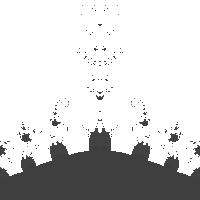

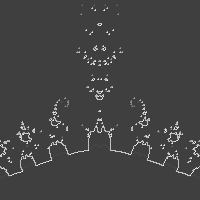

In [6]:
#                                        -- machine with 8 cores --
N = 200
par_set = {'n_rows': N, 'n_cols': N}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 1/8

par_set['it_max'] = 64
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

P = [np.sqrt(np.pi), 1.13761386, -0.11556857]
list_tuple = [(decPwrAFx, (P))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(P, '\n', tt, '\t total time')

Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
# print('Fractal Dimensionn = ', get_fractal_dim(ETn) - 1)

ZrN = ncp.range_norm(ET, lo=0.25, hi=1.0)
display(ncp.gray_mat(ZrN))

ZrN = ncp.range_norm(gu.grad_Im(ETn), lo=0.25, hi=1.0)
R = ncp.gray_mat(ZrN)

display(R)

[1.97243201 1.32849475 0.24972699 2.19615225] 
 12.698761940002441 	 total time
converstion time =	 1.5119638442993164
coloring time =	 3.664773941040039


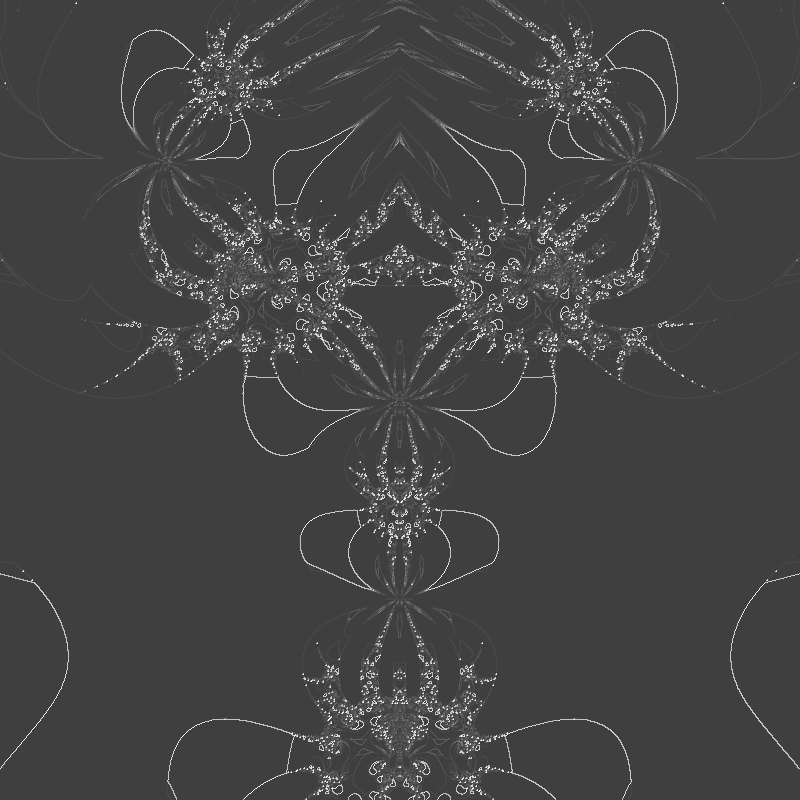

In [8]:
#                                        -- machine with 4 cores --
p_scale = 2
# P = rnd_lambda(p_scale)
P = np.array([1.97243201,  1.32849475,  0.24972699,  2.19615225])

N = 800
par_set = {'n_rows': N, 'n_cols': N}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 1/2

par_set['it_max'] = 16
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(decPwrAFx, (P))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(P, '\n', tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

t0 = time.time()
# ZrN = ncp.range_norm(Zr, lo=0.25, hi=1.0)
# R = ncp.gray_mat(ZrN)

ZrN = ncp.range_norm(gu.grad_Im(ETn), lo=0.25, hi=1.0)
R = ncp.gray_mat(ZrN)

print('coloring time =\t',time.time() - t0)
display(R)

In [ ]:
# def grad_pct(X):
#     """ percentage of X s.t gradient > 0 """
#     I = gu.grad_Im(X)
#     nz = (I == 0).sum()
#     if nz > 0:
#         grad_pct = (I > 0).sum() / nz
#     else:
#         grad_pct = 1
#     return grad_pct

In [9]:
I = gu.grad_Im(ETn)
nz = (I == 0).sum()
nb = (I > 0).sum()

print(nz, nb, ETn.shape[0] * ETn.shape[1], nz + nb) 



558882 81118 640000 640000


In [10]:
P0 = [ 1.68458678,  1.72346312,  0.53931956,  2.92623535]
P1 = [ 1.99808082,  0.68298986,  0.80686446,  2.27772581] 
P2 = [ 1.97243201,  1.32849475,  0.24972699,  2.19615225]
P3 = [ 1.36537498,  1.02648965,  0.60966423,  3.38794403]

coloring time:	 8.53023099899292


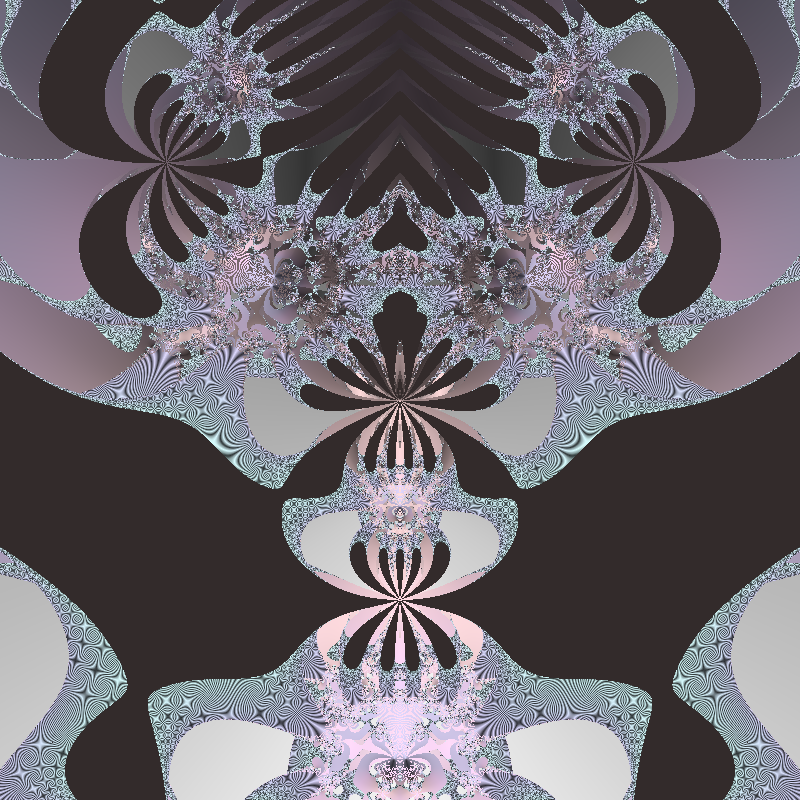

In [11]:
H = ncp.range_norm(1 - Zd, lo=0.5, hi=1.0)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.15)
V = ncp.range_norm(Zr, lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 8.457231760025024


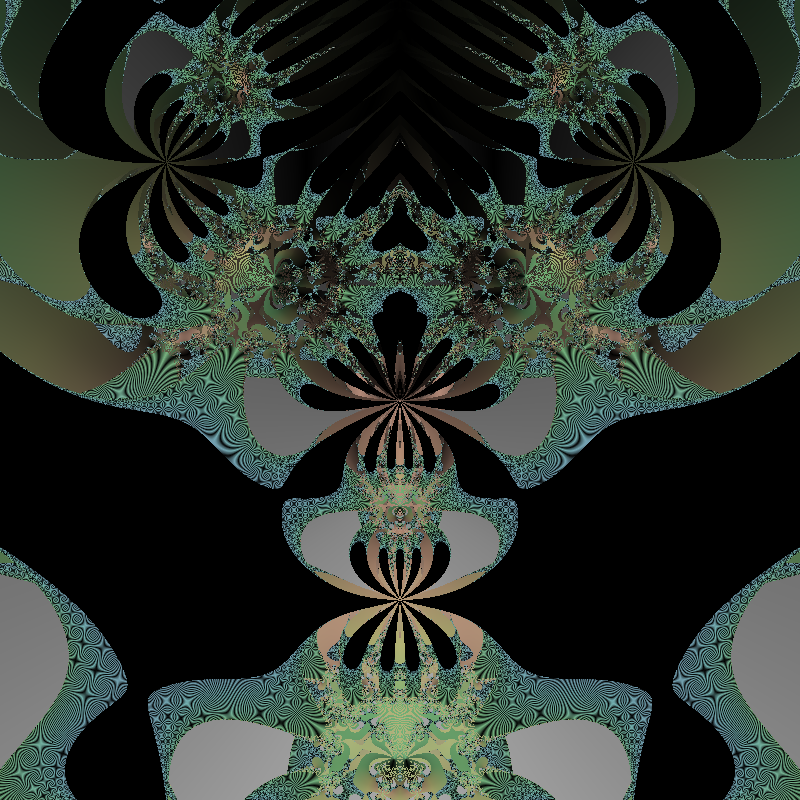

In [12]:
H = ncp.range_norm(Zd, lo=0.05, hi=0.55)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.35)
V = ncp.range_norm(Zr, lo=0.0, hi=0.7)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

###  Below lies unfixed copy

In [17]:
#                                        smaller for analysis
N = 100
par_set = {'n_rows': N, 'n_cols': N}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 1/8

par_set['it_max'] = 64
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
P = [np.sqrt(np.pi), 1.13761386, -0.11556857]
list_tuple = [(decPwrAFx, (P))]

t0 = time.time()
ET_sm, Z_sm, Z0_zm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

1.8263700008392334 	 total time


ET =	 1


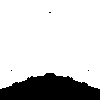

ET =	 2


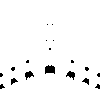

ET =	 3


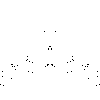

ET =	 4


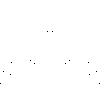

ET =	 5


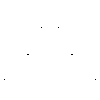

ET =	 6


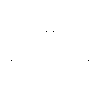

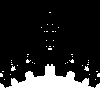

In [18]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [19]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 1964
2 318
3 52
4 14
5 8
6 4
7 2
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 2
19 2
20 0
21 2
22 0
23 2
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 2
48 0
49 2
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0

How many never escaped:
> 7626


In [21]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0_zm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('One Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

One Unescaped Vector:
	V =  11.31 -135.0 degrees

     7626 total unescaped points

   points near V       (plane units)
     3855 within V/ 1  (11.314)
      999 within V/ 2  (5.657)
      451 within V/ 3  (3.771)
      261 within V/ 4  (2.828)
      168 within V/ 5  (2.263)
      119 within V/ 6  (1.886)
       90 within V/ 7  (1.616)
       69 within V/ 8  (1.414)
       54 within V/ 9  (1.257)
       45 within V/10  (1.131)
       39 within V/11  (1.029)
